In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("pima-data.csv")

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.shape

(768, 10)

In [5]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
# Verificar se temos valores nulos no dataset
df.isnull().values.any()

False

In [7]:
# Identificar correlação entre variáveis
def plot_corr(df, size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

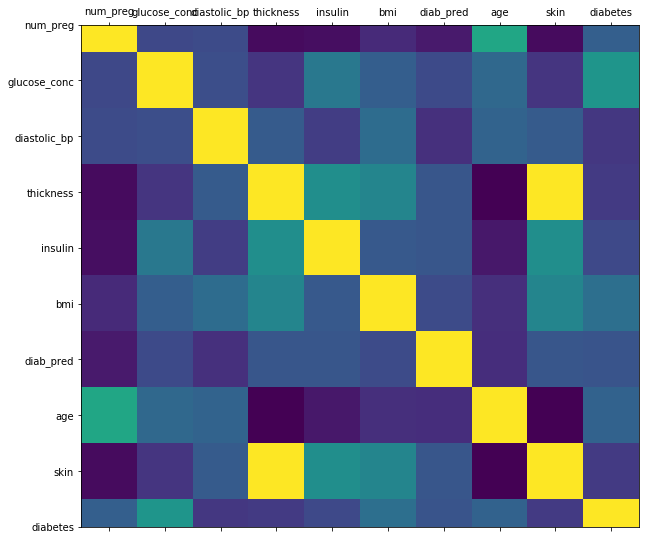

In [8]:
plot_corr(df)

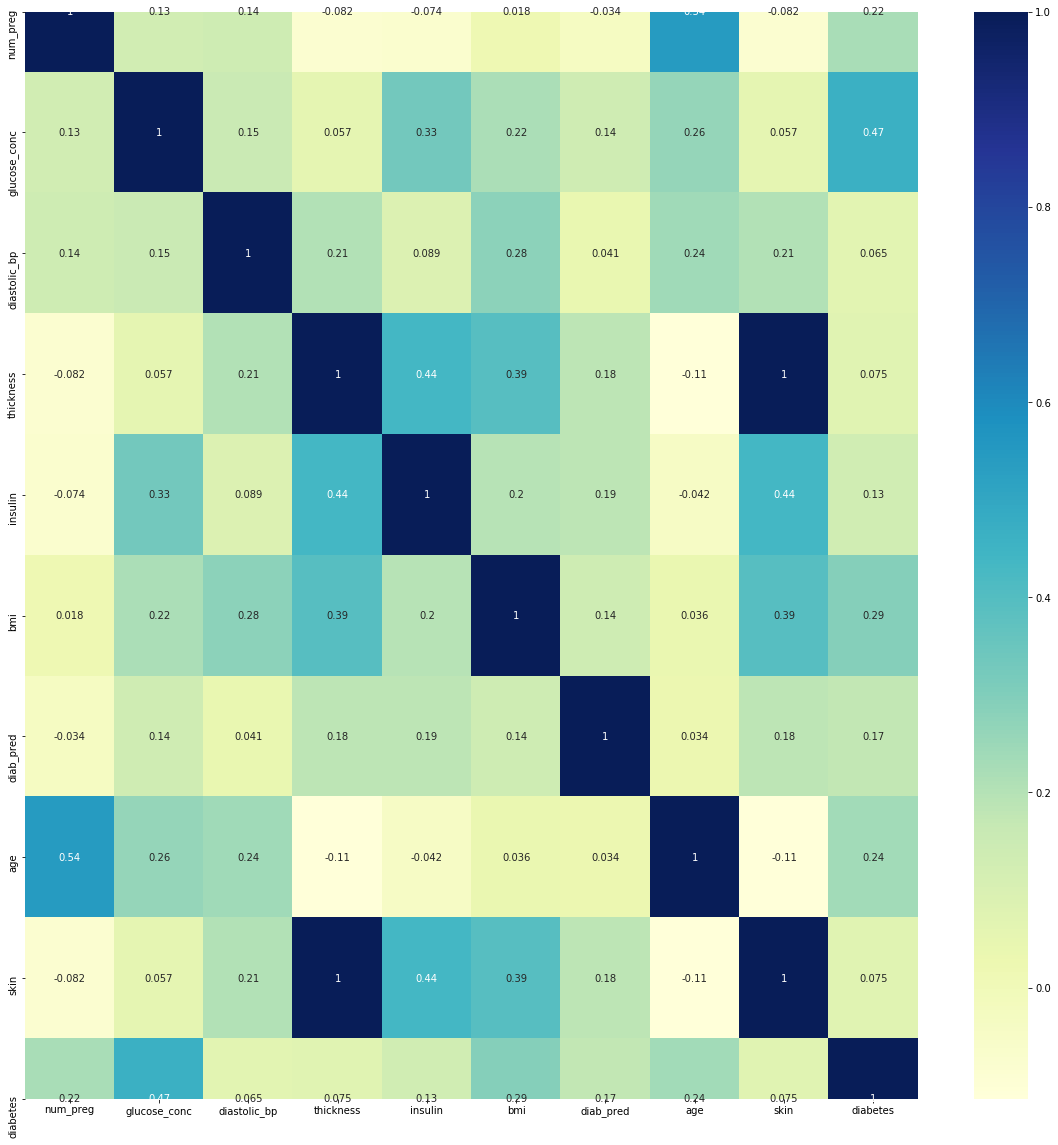

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [10]:
# +1 = forte correlação
# 0 = não há correlação
# -1 = correlaçao negativa

df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
# Definição das classes
diabetes_map = {True: 1, False: 0}

In [12]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [14]:
df.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Número de Casos Falsos: {0} ({1:1.2f}%)".format(num_false, (num_false / (num_true+num_false))*100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos: 500 (65.10%)


In [16]:
# Spliting
# 70% dados de treino 30% dados de teste

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
# Variáveis preditorias
atributos = ["num_preg", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age"]

In [19]:
#Variável target
atrib_target = ["diabetes"]

In [20]:
X = df[atributos].values
Y = df[atrib_target].values

In [21]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [22]:
Y[1:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [23]:
split_test_size = 0.30

In [24]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=split_test_size, random_state=42)

In [25]:
# Substitiui valores 0 do dataframe
from sklearn.impute import SimpleImputer

In [26]:
preenche_0 = SimpleImputer(missing_values=0, strategy="mean")

X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [27]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [28]:
# Contruindo e treinando o modelo 
from sklearn.naive_bayes import GaussianNB

In [29]:
modelo_v1 = GaussianNB()

In [30]:
# Ravel ajusta o shape do objeto
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
# Verificando a exatidão do modelo nos dados de treino
from sklearn import metrics

In [32]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))


Exatidão: 0.7542


In [33]:
nb_predict_teste = modelo_v1.predict(X_teste)
print("Exatidão: {0:.2f}".format(metrics.accuracy_score(Y_teste, nb_predict_teste)))

Exatidão: 0.74


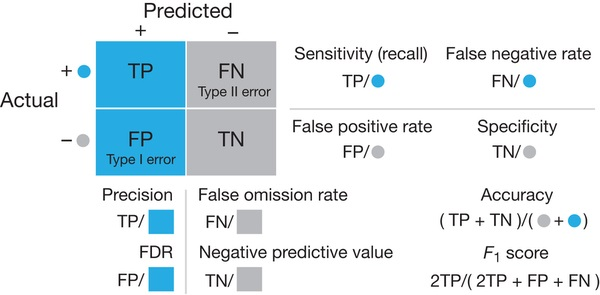

In [34]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [35]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_teste, labels=[1,0])))

print("Classification Metrics Report")
print("{0}".format(metrics.classification_report(Y_teste, nb_predict_teste, labels=[1,0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]
Classification Metrics Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [36]:
# Otimizando o modelo com Random Forest
from sklearn.ensemble import RandomForestClassifier

In [37]:
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_treino, Y_treino.ravel())

C:\Users\carl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidao  dados de treino: {0}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidao  dados de treino: 0.9869646182495344


In [39]:
rf_predict_teste = modelo_v2.predict(X_teste)
print("Exatidao  dados de teste: {0}".format(metrics.accuracy_score(Y_teste, rf_predict_teste)))

Exatidao  dados de teste: 0.70995670995671


In [40]:
print("Dados de teste")
print("Confusion Matrix")
print("Exatidão: {0}".format(metrics.confusion_matrix(Y_teste, rf_predict_teste, labels=[1,0])))

print("Classification Metrics Report")
print("{0}".format(metrics.classification_report(Y_teste, rf_predict_teste, labels=[1,0])))

Dados de teste
Confusion Matrix
Exatidão: [[ 43  37]
 [ 30 121]]
Classification Metrics Report
              precision    recall  f1-score   support

           1       0.59      0.54      0.56        80
           0       0.77      0.80      0.78       151

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
modelo_v3 = LogisticRegression(C = 0.7, random_state=42)
modelo_v3.fit(X_treino, Y_treino.ravel()) 
lr_predict_train = modelo_v3.predict(X_teste)

C:\Users\carl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
print("Exatidao: {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_train)))

print("Classification report")
print(metrics.confusion_matrix(Y_teste, lr_predict_train))


Exatidao: 0.7446
Classification report
[[128  23]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [58]:
print("classification report:")
print( metrics.classification_report(Y_teste, lr_predict_train))

classification report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [59]:
# Resultados

# Native Bayes = 0.73
# Random Forest = 0.71
# Regressão logistica(classificação) = 0.74

In [60]:
# Previsões com modelo treinado
import pickle

In [63]:
filename = 'modelo_treinado.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [64]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [71]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1,-1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1,-1))
print(resultado1)
print(resultado2)

[0]
[1]
